In [1]:
import polars as pl
import matplotlib.pyplot as plt
import matplotx
import tensorflow as tf

import temporal_fusion_transformer as tft
from temporal_fusion_transformer.src.datasets.air_passengers import (
    AirPassengerPreprocessor,
    AirPassengersInference,
    AirPassengersDataset,
)

plt.style.use(matplotx.styles.dufte)

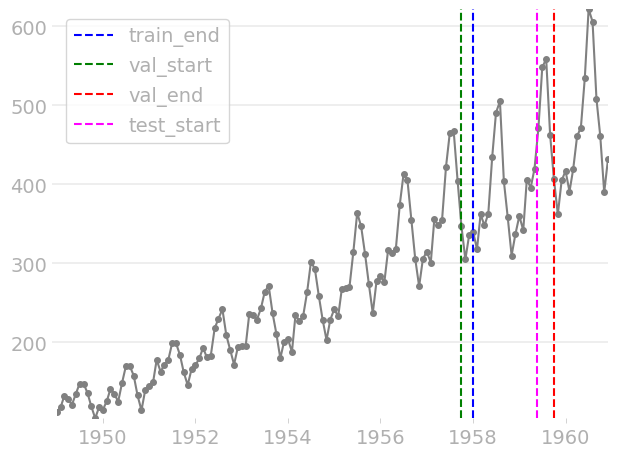

In [2]:
config = tft.Config.read_from_file("../temporal_fusion_transformer/configs/air_passengers.toml")
AirPassengersDataset(config).plot_dataset_splits("../data/air_passengers")

In [3]:
preprocessor: AirPassengerPreprocessor = AirPassengerPreprocessor.load("../data/air_passengers/")
inference = AirPassengersInference(config)
model = tft.TemporalFusionTransformer.build_from_dataclass_config(
    config, weights_path="../data/air_passengers/20231222-1313/model.weights.h5"
)

In [4]:
test_df = pl.read_csv("../data/air_passengers/test.csv")
x = inference.prepare_model_input(preprocessor.transform(test_df))
y_pred = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


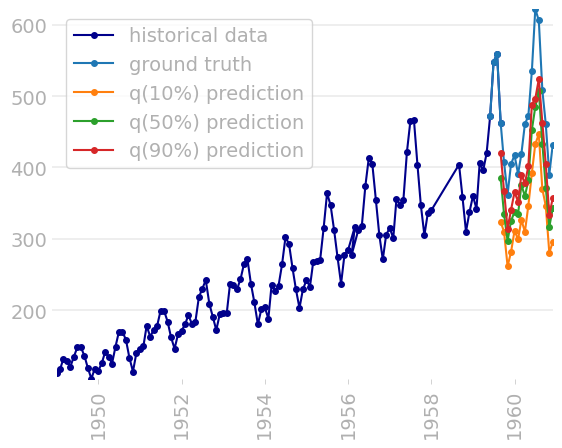

In [6]:
historical_ds = tf.data.Dataset.load("../data/air_passengers/training").concatenate(
    tf.data.Dataset.load("../data/air_passengers/validation")
)
historical_df = preprocessor.inverse_transform(
    inference.dataframe_from_time_series_dataset(historical_ds)
)

inference.plot_predictions(test_df, y_pred, preprocessor.target["passengers"], historical_df)

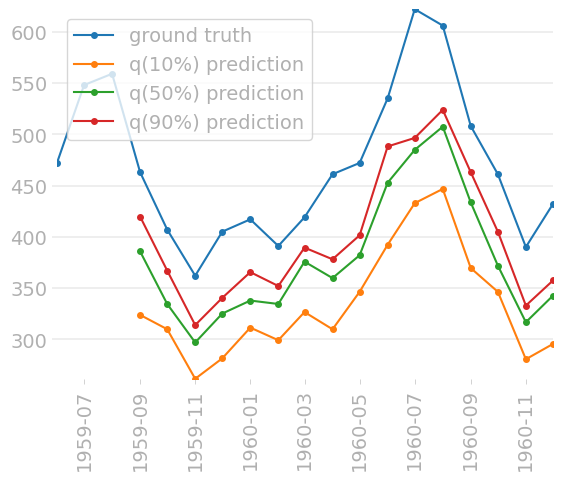

In [7]:
inference.plot_predictions(test_df, y_pred, preprocessor.target["passengers"])